In [1]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from variational_autoencoder import VariationalAutoencoder
import numpy.random as rnd
from autoencoder import Autoencoder
from mnist_encoder_decoder import MNISTVariationalEncoder, MNISTVariationalDecoder
from normal_sampling_layer import NormalSamplingLayer

In [3]:
# Global variables
latent_dim = 4

## Setup data
Load and preprocess data

After this section we will have the two variables *mnist_digits* and *mnist_labels*. They are both numpy arrays

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
mnist_labels = np.concatenate([y_train, y_test], axis=0)
input_shape = mnist_digits.shape[1:]
input_shape

(28, 28, 1)

## Setup autoencoders
Define the encoder and decoder which are then the defining features of our variational encoder and decoder

Define the encoders and decoders. The code is simply repeated for the autoencoder and the variational autoencoder. The only difference is that there is a parallell layer in the encoder for the variational autoencoder which defindes the variacnes.

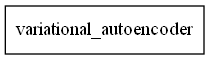

In [5]:
# Variational autoencoder
va_encoder = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(4, (3,3), padding = "same", activation = "relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(8, (3,3), padding = "same", activation = "relu"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(16, (3,3), padding = "same", activation = "relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(2*latent_dim),
    keras.layers.Reshape((2,latent_dim)),
], name = "Encoder" )

va_decoder = keras.Sequential([
            keras.Input((latent_dim,)),
            keras.layers.Dense(16*7*7, activation = "relu"),
            keras.layers.Reshape((7,7,16)),
            keras.layers.Conv2DTranspose(16, (3,3), activation = "relu", padding = "same"),
            keras.layers.UpSampling2D((2,2)),
            keras.layers.Conv2DTranspose(8, (3,3), activation = "relu", padding = "same"),
            keras.layers.UpSampling2D((2,2)),
            keras.layers.Conv2DTranspose(1, (3,3), activation = "sigmoid", padding = "same"),
], name = "Decoder")
#va = VariationalAutoencoder(va_encoder, va_decoder)
#va.summary()
va = VariationalAutoencoder(va_encoder, va_decoder)
keras.utils.plot_model(va, expand_nested = True)

## Set up the autoencoder instances

In [6]:
#ae = Autoencoder(encoder_auto, decoder_auto)
#ae.compile(optimizer=keras.optimizers.Adam(), loss = "mse")
va.compile(optimizer=keras.optimizers.Adam())

In [7]:
"""
ae.fit(mnist_digits,mnist_digits,
      epochs = 20,
      batch_size = 256)
"""
va.fit(mnist_digits,
      epochs = 20,
      batch_size = 256)

Epoch 1/20
274/274 [==============================] - 29s 99ms/step - loss: 290.6243 - reconstruction_loss: 212.0040 - kl_loss: 6.6375
Epoch 2/20
274/274 [==============================] - 27s 99ms/step - loss: 154.7254 - reconstruction_loss: 141.8934 - kl_loss: 8.6465
Epoch 3/20
274/274 [==============================] - 28s 101ms/step - loss: 143.9298 - reconstruction_loss: 133.8104 - kl_loss: 9.0249
Epoch 4/20
274/274 [==============================] - 27s 100ms/step - loss: 140.4823 - reconstruction_loss: 130.7142 - kl_loss: 9.1772
Epoch 5/20
274/274 [==============================] - 29s 106ms/step - loss: 138.4799 - reconstruction_loss: 128.9257 - kl_loss: 9.2777
Epoch 6/20
274/274 [==============================] - 27s 99ms/step - loss: 137.2912 - reconstruction_loss: 127.6540 - kl_loss: 9.3568
Epoch 7/20
274/274 [==============================] - 27s 100ms/step - loss: 136.0759 - reconstruction_loss: 126.7165 - kl_loss: 9.4043
Epoch 8/20
274/274 [==============================]

## Investigate models


In [9]:
#ae_reconstructions = ae(mnist_digits)
va_reconstructions = va(mnist_digits)


### Project the latent space

In [14]:
i = 151
plt.subplot(1,2,1)
plt.imshow(mnist_digits[i])
plt.subplot(1,2,2)
plt.imshow(va_reconstructions[i])
mnist_labels[i]

6

In [15]:
# import projection objects
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [16]:
# Predict the latent points for each input data
#ae_mean = ae.encoder.p(mnist_digits)
va_mean= va.encode(mnist_digits)

In [10]:
# Project the latent point according to the t-SNE algorithm
#ae_tsne = TSNE().fit_transform(ae_mean)
#va_tsne = TSNE().fit_transform(va_mean)

In [17]:
# Project the latent point according to PCA and caluclate the principal axes
#pca_ae = PCA(n_components = 2).fit(ae_mean)
#ae_pca = pca_ae.transform(ae_mean)
#ae_vectors = (pca_ae.components_.T *3*np.sqrt(pca_ae.explained_variance_)).T
#ae_origin = np.mean(ae_mean, axis = 0)

pca_va = PCA(n_components = 2).fit(va_mean)
va_pca = pca_va.transform(va_mean)
va_vectors = (pca_va.components_.T *3*np.sqrt(pca_va.explained_variance_)).T
va_origin = np.mean(va_mean, axis = 0)

### Run Gui:s

### Sample scatter plot
This visualization shows a 2D representation of the latent space and where each of the input point has been projected. This projection is done previously and is usually a PCA or t-SNE. Note that only one of the figures can work interactily at once.

In [18]:
#from samplescattergui import SampleScatterGUI
from latent_plane_mosaic import LatentPlaneMosaic
from latent_interpolation_mosaic import LatentInterpolationMosaic

### Sample Scatter GUI

In [13]:
# PCA/t-SNE of the autoencoder
#SampleScatterGUI(ae_pca, mnist_labels, mnist_digits)
#SampleScatterGUI(ae_tsne, mnist_labels, mnist_digits)


In [14]:
# PCA/t-SNE of the Variational Autoencoder
#SampleScatterGUI(va_pca, mnist_labels, mnist_digits)
#SampleScatterGUI(va_tsne, mnist_labels, mnist_digits)

### Latent Plane GUI

In [15]:
#LatentPlaneMosaic(ae.decoder,latent_vectors = ae_vectors, latent_origin = ae_origin)

In [43]:
LatentPlaneMosaic(va.decoder,latent_vectors = va_vectors, latent_origin = va_origin,
                 num_row = 20, num_col = 20).show_mosaic()

### Latent Interpolation Mosaic

In [21]:
indeces = [30,400,1203]
LatentInterpolationMosaic(ae.encoder,
                          ae.decoder,
                          mnist_digits,
                          indeces,
                          num_row = 15,
                          num_col = 15,
                          variational = False)

In [19]:
indeces = [30,400,1203]
LatentInterpolationMosaic(va.encode,
                          va.decoder,
                          mnist_digits,
                          indeces,
                          num_row = 15,
                          num_col = 15).show_mosaic()

AttributeError: 'Functional' object has no attribute 'Input'

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
va.predict(mnist_digits)

NameError: name 'ae' is not defined

In [32]:
keras.utils.plot_model(va.encoder, expand_nested = True)

AttributeError: 'DenseBlockLayer' object has no attribute '_is_graph_network'

[<tf.Variable 'variational_autoencoder_1/dense_block_layer_2/dense_4/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.02771027, -0.00202511,  0.06125293, ...,  0.07441264,
         -0.06808323, -0.05319108],
        [-0.01940939, -0.0584645 ,  0.0557312 , ..., -0.07566355,
         -0.0046882 ,  0.00118186],
        [ 0.02232198, -0.06376348,  0.07441115, ...,  0.03707593,
          0.02591281,  0.02884451],
        ...,
        [-0.00221512,  0.00118216, -0.03305642, ..., -0.07580428,
          0.07315595, -0.00320139],
        [-0.04254595, -0.02291542,  0.07915518, ..., -0.01051845,
          0.06375469,  0.05086007],
        [-0.05494902,  0.02680489,  0.06560836, ..., -0.02077612,
          0.08011579, -0.01505313]], dtype=float32)>,
 <tf.Variable 'variational_autoencoder_1/dense_block_layer_2/dense_4/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.01288231, -0.64809793, -0.01950503,  2.456859  , -0.02103493,
        -0.61141324,  2.1000855 ,  0.41000456,  1.805755